In [52]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-strikes.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [58]:
# df = df[df["batter_mods"].isna() & df["pitcher_mods"].isna()]
df = df[~df["batter_mods"].astype(str).str.contains("FLINCH") & 
        ~df["batter_mods"].astype(str).str.contains("OVERPERFORMING") &
        ~df["batter_mods"].astype(str).str.contains("UNDERPERFORMING") &
        ~df["pitcher_mods"].astype(str).str.contains("OVERPERFORMING") &
        ~df["pitcher_mods"].astype(str).str.contains("UNDERPERFORMING") &
        ~df["batting_team_mods"].astype(str).str.contains("HIGH_PRESSURE") &
        ~df["batting_team_mods"].astype(str).str.contains("GROWTH") &
        ~df["batting_team_mods"].astype(str).str.contains("SINKING_SHIP") &
        ~df["batting_team_mods"].astype(str).str.contains("TRAVELING") &
        ~df["pitching_team_mods"].astype(str).str.contains("HIGH_PRESSURE") &
        ~df["pitching_team_mods"].astype(str).str.contains("GROWTH") &
        ~df["pitching_team_mods"].astype(str).str.contains("SINKING_SHIP") &
        ~df["pitching_team_mods"].astype(str).str.contains("TRAVELING")]
# df = df[~df["batting_team_mods"].astype(str).str.contains("HIGH_PRESSURE")]
# df = df[~df["pitching_team_mods"].astype(str).str.contains("HIGH_PRESSURE")]
print(df.columns)
print(len(df))

Index(['Unnamed: 0', 'event_type', 'roll', 'passed', 'batter_name',
       'batter_buoyancy', 'batter_divinity', 'batter_martyrdom',
       'batter_moxie', 'batter_musclitude', 'batter_patheticism',
       'batter_thwackability', 'batter_tragicness', 'batter_multiplier',
       'batter_mods', 'batting_team_mods', 'batting_team_name', 'pitcher_name',
       'pitcher_ruthlessness', 'pitcher_overpowerment',
       'pitcher_unthwackability', 'pitcher_shakespearianism',
       'pitcher_suppression', 'pitcher_coldness', 'pitcher_multiplier',
       'pitching_team_name', 'pitcher_chasiness', 'pitcher_mods',
       'pitching_team_mods', 'defense_avg_anticapitalism',
       'defense_avg_chasiness', 'defense_avg_omniscience',
       'defense_avg_tenaciousness', 'defense_avg_watchfulness',
       'ballpark_grandiosity', 'ballpark_fortification', 'ballpark_obtuseness',
       'ballpark_ominousness', 'ballpark_inconvenience', 'ballpark_viscosity',
       'ballpark_forwardness', 'ballpark_mysticism'

In [59]:
digest_list = ["event_type", "roll", "batter_name", "pitcher_name",
               "pitcher_ruthlessness", "pitcher_vibes", "batter_musclitude", "ballpark_forwardness", "game_id", "play_count", "svc_musc"]

In [60]:
df['svc'] = 0.37847946767478163 * df["pitcher_ruthlessness"] + 0.30163948661504275 * df["ballpark_forwardness"]
# df['svc_vibes'] = 0.3570080647613859 * df["pitcher_ruthlessness"] + 0.23460353690794863 * df["ballpark_forwardness"] \
#                   + 0.06376601180181157 * df["pitcher_vibes"]
df['svc_vibes'] = 0.35 * df["pitcher_ruthlessness"] + 0.25 * df["ballpark_forwardness"] \
                  + 0.05 * df["pitcher_vibes"]
df['svc_musc'] = 0.31647362 * df["pitcher_ruthlessness"] + 0.20359297 * df["ballpark_forwardness"] \
                  + 0.05434203 * df["pitcher_vibes_multiplied"] + 0.09587699 * df["batter_musclitude"]
df['batter_strikeattr'] = df['batter_moxie'] * ~df['passed'] + df['batter_patheticism'] * df['passed']
df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']
df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']

# array([ 1.        , -0.31647362, -0.20359297, -0.05434203, -0.09587699])

df = df[(df["batting_team_hype"] == 0) & (df['pitching_team_hype'] == 0)]

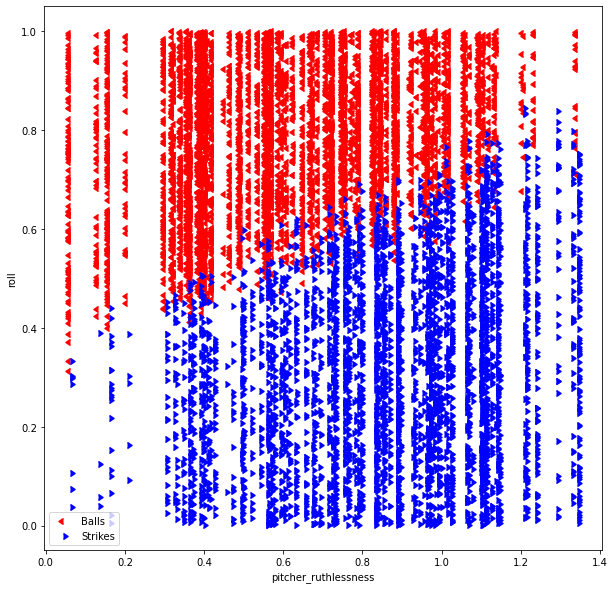

In [65]:
x_val = "pitcher_ruthlessness"
# x_val = "svc_musc"
fig, ax = plt.subplots(1, figsize=(10,10))
ax.scatter(df[~df['passed']][x_val], df[~df['passed']]["roll"], color="red", label="Balls", marker=CARETLEFTBASE)
ax.scatter(df[df['passed']][x_val], df[df['passed']]["roll"], color="blue", label="Strikes", marker=CARETRIGHTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
# ax.set_xlim(0.484, 0.499)

[(1.0, 'roll'),
 (-0.32632849618190135, 'pitcher_ruthlessness'),
 (-0.21512716755985498, 'ballpark_forwardness'),
 (-0.09480214236283908, 'batter_musclitude'),
 (-0.050859815153191414, 'pitcher_vibes_multiplied')]

ax.legend()

# fig.savefig(x_val+".png", facecolor='white')
# endpoints = np.array(ax.get_xlim())
# ax.plot(endpoints, 0.35 + 0.35 * endpoints)

In [63]:
# # df['svc'] = 0.37847946767478163 * df["pitcher_ruthlessness"] + 0.30163948661504275 * df["ballpark_forwardness"]
# # # df['svc_vibes'] = 0.3570080647613859 * df["pitcher_ruthlessness"] + 0.23460353690794863 * df["ballpark_forwardness"] \
# # #                   + 0.06376601180181157 * df["pitcher_vibes"]
# # df['svc_vibes'] = 0.35 * df["pitcher_ruthlessness"] + 0.25 * df["ballpark_forwardness"] \
# #                   + 0.05 * df["pitcher_vibes"]
# # df['svc_musc'] = 0.3212559599419537 * df["pitcher_ruthlessness"] + 0.20432227034293363 * df["ballpark_forwardness"] \
# #                   + 0.05261300852429272 * df["pitcher_vibes"] + 0.09617264811441883 * df["batter_musclitude"]
# # df['batter_strikeattr'] = df['batter_moxie'] * ~df['passed'] + df['batter_patheticism'] * df['passed']
# # df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']
# # df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']

# # df = df[(df["batting_team_hype"] == 0) & (df['pitching_team_hype'] == 0)]
# df2 = df[df["pitcher_name"] == "Winnie Hess"]
# # x_val = "pitcher_ruthlessness"
# x_val = "svc_musc"
# fig, ax = plt.subplots(1, figsize=(10, 10))
# ax.scatter(df2[~df2['passed']][x_val], df2[~df2['passed']]["roll"], color="red", label="Balls", marker=CARETLEFTBASE)
# ax.scatter(df2[df2['passed']][x_val], df2[df2['passed']]["roll"], color="blue", label="Strikes", marker=CARETRIGHTBASE)
# # ax.scatter(df2[df2['batter_name'] == 'Cedric Spliff'][x_val], df2[df2['batter_name'] == 'Cedric Spliff']["roll"], color="blue", label="Strikes", marker='o')
# ax.set_xlabel(x_val)
# ax.set_ylabel('roll')
# ax.set_xlim(0.44, 0.47)

# ax.legend()

# # 0.438451
# # 0.452406

# # fig.savefig(x_val+".png", facecolor='white')
# # endpoints = np.array(ax.get_xlim())
# # ax.plot(endpoints, 0.35 + 0.35 * endpoints)

In [6]:
df2.loc[(df2['svc_musc'] > 0.457) & (df2['svc_musc'] < 0.465) & True]\
    .sort_values(by='roll')

,Unnamed: 0,event_type,roll,passed,batter_name,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,...,stadium_id,play_count,weather,ball_count,strike_count,svc,svc_vibes,svc_musc,batter_strikeattr,ruth_and_fwd


In [7]:
(df.loc[(df['svc_vibes'] > 0.473) & (df['svc_vibes'] < 0.4734)])\
    .groupby('game_id').head(1)[[ 'pitcher_name', 'game_id']]

,pitcher_name,game_id


In [8]:
(df.loc[(df['svc_vibes'] > 0.5174) & (df['svc_vibes'] < 0.518)])\
    .groupby('game_id').head(1)[[ 'pitcher_name', 'game_id']]

,pitcher_name,game_id


In [9]:
df.loc[(df['svc_vibes'] > 0.5174) & (df['svc_vibes'] < 0.518) & (df['event_type'] == 'StrikeLooking')]\
    .sort_values(by='roll')

,Unnamed: 0,event_type,roll,passed,batter_name,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,...,stadium_id,play_count,weather,ball_count,strike_count,svc,svc_vibes,svc_musc,batter_strikeattr,ruth_and_fwd


In [64]:
df.groupby('pitcher_ruthlessness').head(1)[['pitcher_ruthlessness', 'pitcher_name']].sort_values(
    'pitcher_ruthlessness', ascending=False)[0:20]


,pitcher_ruthlessness,pitcher_name
5071,1.341412,Burke Gonzales
12866,1.327721,Gabriel Griffith
12988,1.289278,Brock Forbes
5059,1.236492,Theodore Cervantes
2771,1.211592,Betsy Trombone
148,1.204338,Coolname Galvanic
11575,1.142962,Uncle Plasma
129,1.137700,Qais Dogwalker
3877,1.136143,Elvis Figueroa
9049,1.131745,Curry Aliciakeyes


In [56]:
df.groupby(['batting_team_mods']).size()

batting_team_mods
AFFINITY_FOR_CROWS                                       556
BASE_INSTINCTS                                           649
BIRD_SEED                                                283
BIRD_SEED;PARTY_TIME                                     368
BOTTOM_DWELLER                                           465
BOTTOM_DWELLER;PARTY_TIME                                145
CARCINIZATION;UNHOLEY;PARTY_TIME                        1038
EARLBIRDS                                                273
EARLBIRDS;PARTY_TIME                                     374
FIREPROOF;SEALANT;AMBUSH                                 590
GROWTH                                                   576
HIGH_PRESSURE                                            513
HIGH_PRESSURE;OVERPERFORMING                              93
LIFE_OF_PARTY;ELECTRIC                                   492
LIFE_OF_PARTY;ELECTRIC;BOTTOM_DWELLER;BOTTOM_DWELLER      81
LIFE_OF_PARTY;ELECTRIC;PARTY_TIME                        145
LOVE  

In [12]:
# X = df[['roll', *df.columns[5:-11]]].drop('pitcher_name', axis=1).drop('batter_mods', axis=1)\
#     .drop('batting_team_mods', axis=1).drop('pitching_team_mods', axis=1).drop('pitcher_mods', axis=1)\
#     .drop('batter_vibes', axis=1).drop('pitcher_vibes', axis=1)\
#     .drop('batter_multiplier', axis=1).drop('pitcher_multiplier', axis=1)
X = df[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness', 'pitcher_vibes_multiplied', 'batter_musclitude']]
# X = df[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = df[['roll', 'pitcher_ruthlessness']]
y = df['passed']

In [13]:
X

,roll,pitcher_ruthlessness,ballpark_forwardness,pitcher_vibes_multiplied,batter_musclitude
10,0.559500,1.074474,0.596960,-0.349489,0.855505
11,0.127954,1.074474,0.596960,-0.349489,0.489106
18,0.460657,1.074474,0.596960,-0.349489,0.887398
19,0.300126,1.074474,0.596960,-0.349489,0.887398
20,0.565521,1.074474,0.596960,-0.349489,1.001760
...,...,...,...,...,...
15382,0.394722,1.074474,0.566199,-0.493691,0.903956
15383,0.816184,1.074474,0.566199,-0.493691,0.903956
15384,0.969822,0.845408,0.574707,-0.240879,0.717220
15385,0.793761,1.074474,0.566199,-0.493691,0.903956


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y,predictionsvm))
print(classification_report(y,predictionsvm))

[[5449   15]
 [  23 4484]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      5464
        True       1.00      0.99      1.00      4507

    accuracy                           1.00      9971
   macro avg       1.00      1.00      1.00      9971
weighted avg       1.00      1.00      1.00      9971



In [16]:
coef = np.true_divide(trainedsvm.coef_,  sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

In [17]:
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(1.0, 'roll'),
 (-0.3164736226613006, 'pitcher_ruthlessness'),
 (-0.20359296729179768, 'ballpark_forwardness'),
 (-0.0958769878763307, 'batter_musclitude'),
 (-0.0543420259072568, 'pitcher_vibes_multiplied')]

In [18]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
intercept_scaled

array([-0.18537371])

In [19]:
df_strikes = df[df['event_type'] == "StrikeLooking"]
df_flinch = df[df['event_type'] == "StrikeFlinching"]
df_balls = df[df['event_type'] == "Ball"]

In [20]:
df_strikes[df_strikes.roll == df_strikes.roll.max()].loc[:, digest_list]

,event_type,roll,batter_name,pitcher_name,pitcher_ruthlessness,pitcher_vibes,batter_musclitude,ballpark_forwardness,game_id,play_count,svc_musc
7783,StrikeLooking,0.843714,Lou Roseheart,Coolname Galvanic,1.204338,0.620751,1.291551,0.586028,e8421a0a-ee41-4158-8bb0-beb3b391bc95,23,0.658016


In [21]:
df_balls[df_balls.roll == df_balls.roll.min()].loc[:, digest_list]

,event_type,roll,batter_name,pitcher_name,pitcher_ruthlessness,pitcher_vibes,batter_musclitude,ballpark_forwardness,game_id,play_count,svc_musc
3601,Ball,0.311938,Elijah Valenzuela,Flattery McKinley,0.060292,-0.161381,0.041163,0.440855,5c58de61-5437-4ec3-bf35-d6ea4579c5ad,227,0.104012


In [22]:
# df_strikes[(df_strikes['pitcher_name'] == 'Flattery McKinley') & \
#         (df_strikes['game_id'] == '5c58de61-5437-4ec3-bf35-d6ea4579c5ad')]\
#         .loc[:, digest_list].sort_values('roll', ascending=False)

# # 232f0083-bc94-454e-96a2-da367c5b7a06 or 5c58de61-5437-4ec3-bf35-d6ea4579c5ad

In [23]:
# df_balls[(df_balls['pitcher_name'] == 'Flattery McKinley') & \
#         (df_balls['game_id'] == '5c58de61-5437-4ec3-bf35-d6ea4579c5ad')]\
#         .loc[:, digest_list].sort_values('roll', ascending=True)

In [24]:
trainedsvm.score(X2, y)

0.9961889479490522

In [25]:
n_overlaps = 0
n_pitcher_games = 0
grouped = df.groupby(['pitcher_name', 'batter_name', 'game_id'])
for name, group in grouped:
    n_pitcher_games += 1
    minroll = 0
    maxroll = 0
    lengroup = len(group)
    grouped2 = group.groupby('event_type')
    for name2, group2 in grouped2:
        if name2 == "Ball":
            minroll = group2['roll'].min()
        elif name2 == "StrikeLooking":
            maxroll = group2['roll'].max()

        if (maxroll > minroll) and maxroll > 0 and minroll > 0:
            print("OVERLAP!", name, lengroup)
            print(maxroll, minroll)
            n_overlaps += 1

In [26]:
print(n_overlaps, n_pitcher_games)

0 1583


In [27]:
df.loc[(df['game_id'] == 'aeac9740-6fd6-43cb-86a2-a1f5ed56b195')]

,Unnamed: 0,event_type,roll,passed,batter_name,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,...,stadium_id,play_count,weather,ball_count,strike_count,svc,svc_vibes,svc_musc,batter_strikeattr,ruth_and_fwd


In [28]:
df2.groupby('game_id').head(1)[['game_id', 'pitcher_name']].sort_values('game_id')


,game_id,pitcher_name


In [29]:
df_balls[(df_balls['pitcher_name'] == 'Winnie Hess') & \
        (df_balls['game_id'] == 'aeac9740-6fd6-43cb-86a2-a1f5ed56b195')]\
        .loc[:, [*digest_list]].sort_values('roll', ascending=True)

,event_type,roll,batter_name,pitcher_name,pitcher_ruthlessness,pitcher_vibes,batter_musclitude,ballpark_forwardness,game_id,play_count,svc_musc


In [30]:
df_strikes[(df_strikes['pitcher_name'] == 'Winnie Hess') & \
        (df_strikes['game_id'] == 'aeac9740-6fd6-43cb-86a2-a1f5ed56b195')]\
        .loc[:, [*digest_list]].sort_values('roll', ascending=False)

,event_type,roll,batter_name,pitcher_name,pitcher_ruthlessness,pitcher_vibes,batter_musclitude,ballpark_forwardness,game_id,play_count,svc_musc


In [31]:
df_flinch[(df_flinch['pitcher_name'] == 'Grollis Zephyr') & \
        (df_flinch['game_id'] == '4f3bc44a-ef01-4a4a-88ec-de252d0b527c')]\
        .loc[:, [*digest_list, "batter_mods"]].sort_values('roll', ascending=False)

,event_type,roll,batter_name,pitcher_name,pitcher_ruthlessness,pitcher_vibes,batter_musclitude,ballpark_forwardness,game_id,play_count,svc_musc,batter_mods


38


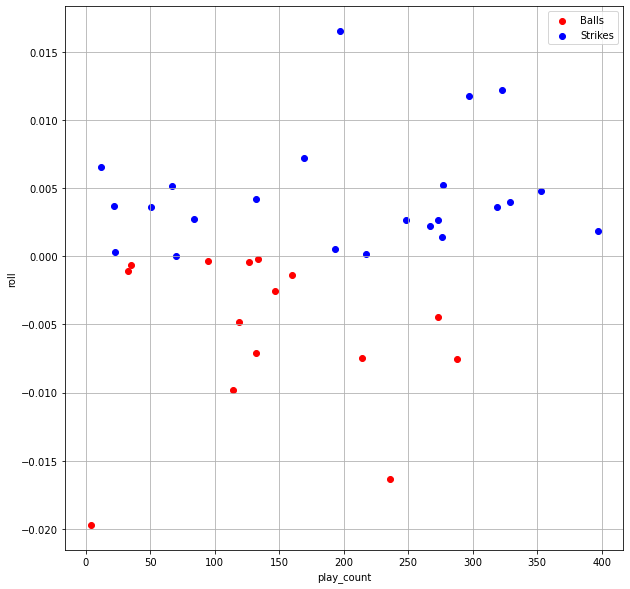

In [48]:
# df["threshold"] = 0.175 + 0.325 * df["pitcher_ruthlessness"] + 0.2 * df["ballpark_forwardness"]\
#     + 0.1 * df["batter_musclitude"] + 0.05 * df["pitcher_vibes_multiplied"]
df["threshold"] = -1 * (\
    coef_scaled[0,0] * intercept_scaled + \
    coef_scaled[0,1] * df["pitcher_ruthlessness"] + \
    coef_scaled[0,2] * df["ballpark_forwardness"] + \
    coef_scaled[0,4] * df["batter_musclitude"] + \
    coef_scaled[0,3] * df["pitcher_vibes_multiplied"])

df["offset"] = df["roll"] - df["threshold"]

outliers = df[(df["passed"] & (df["offset"] > 0)) | (~df["passed"] & (df["offset"] < 0))]
print(len(outliers))

fig, ax = plt.subplots(1)
fig.set_size_inches(10, 10)
x_val = "play_count"
ax.scatter(outliers[~outliers['passed']][x_val], outliers[~outliers['passed']]["offset"], color="red", label="Balls")
ax.scatter(outliers[outliers['passed']][x_val], outliers[outliers['passed']]["offset"], color="blue", label="Strikes")
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.grid()
ax.legend()
# ax.set_xlim(0, 1.4)
# ax.set_xlim(0.1, 0.7)
# ax.set_ylim(-0.06, 0.08)
# fig.savefig("fit_outliers.png", facecolor='white')

In [33]:
coef_scaled[0,:]

array([ 1.        , -0.31647362, -0.20359297, -0.05434203, -0.09587699])

In [34]:
intercept_scaled

array([-0.18537371])

In [35]:
col_list = ['event_type',
            'roll',
            'threshold',
            'offset',
            'batting_team_name',
            'pitching_team_name',
            'game_id']#,
#             'pitcher_ruthlessness',
#             'ballpark_forwardness',
#             'pitcher_vibes_multiplied',
#             'batter_musclitude']

In [36]:
outliers.loc[outliers['offset'] > 0].sort_values('offset', ascending=False).loc[:, col_list].style.hide()

event_type,roll,threshold,offset,batting_team_name,pitching_team_name,game_id
StrikeLooking,0.439021,0.422503,0.016517,Lift,Jazz Hands,82f9920a-1768-474f-9fab-65d380e78a1f
StrikeLooking,0.493209,0.481053,0.012156,Lift,Jazz Hands,82f9920a-1768-474f-9fab-65d380e78a1f
StrikeLooking,0.450473,0.438749,0.011724,Tacos,Georgias,e287b0e2-4f08-461f-a147-b84c29485d47
StrikeLooking,0.462226,0.455041,0.007185,Garages,Magic,fe142929-a872-4863-9e3c-f974805d07d3
StrikeLooking,0.473359,0.466792,0.006568,Georgias,Worms,78db17e6-719f-422e-830c-d70233df30b7
StrikeLooking,0.716075,0.710815,0.005260,Mechanics,Pies,2600dd43-3e57-479c-a60e-a120ba1a98a8
StrikeLooking,0.837320,0.832203,0.005117,Steaks,Crabs,20cf862b-201d-41ad-b9fa-0971a5d9d856
StrikeLooking,0.511097,0.506306,0.004791,Spies,Wild Wings,5ffd315d-53ba-4f1a-aa1a-e74c308fa6a3
StrikeLooking,0.798390,0.794189,0.004201,Mechanics,Lovers,34d94e42-f9d9-4c37-87d5-b662d5bd4259
StrikeLooking,0.451254,0.447254,0.004001,Lovers,Mechanics,34d94e42-f9d9-4c37-87d5-b662d5bd4259


In [37]:
# df["threshold"] = \
#     0.175 * 1 + \
#     0.325 * df["pitcher_ruthlessness"] + \
#     0.2 * df["ballpark_forwardness"] + \
#     0.1 * df["batter_musclitude"] + \
#     0.05 * df["pitcher_vibes_multiplied"]
# df["threshold"] = \
#     coef_scaled[0,0] * intercept_scaled + \
#     coef_scaled[0,1] * df["pitcher_ruthlessness"] + \
#     coef_scaled[0,2] * df["ballpark_forwardness"] + \
#     coef_scaled[0,4] * df["batter_musclitude"] + \
#     coef_scaled[0,3] * df["pitcher_vibes_multiplied"]


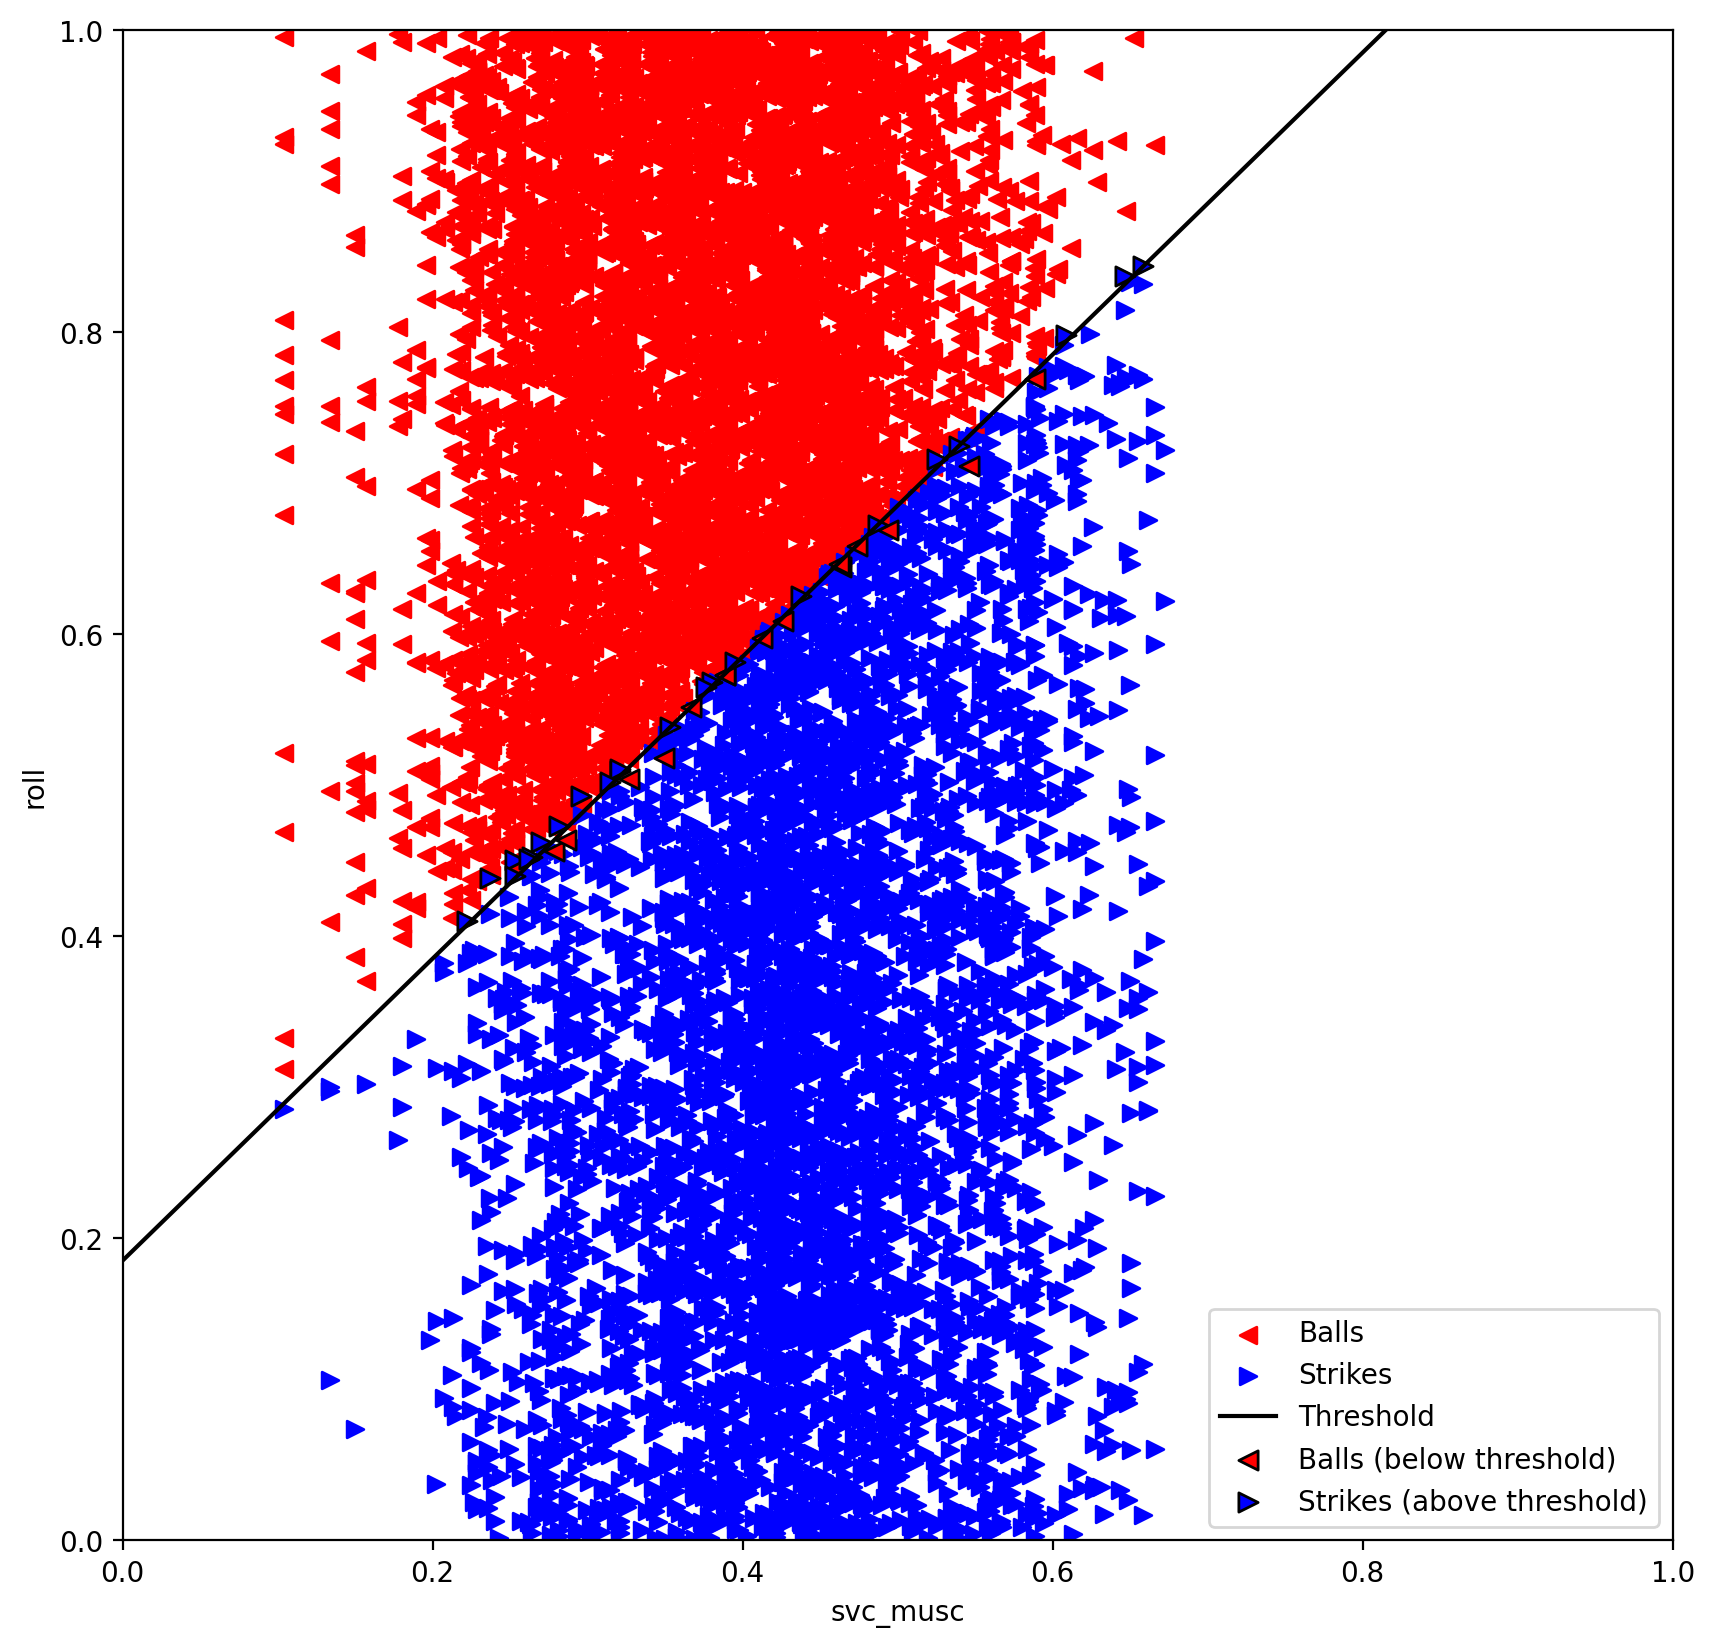

In [38]:
from matplotlib.font_manager import FontProperties
prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc')

# x_val = "pitcher_ruthlessness"
x_val = "svc_musc"
fig, ax = plt.subplots(1, figsize=(10,10), dpi=200)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.scatter(df[~df['passed']][x_val], df[~df['passed']]["roll"], color="red", label="Balls", marker='<')
ax.scatter(df[df['passed']][x_val], df[df['passed']]["roll"], color="blue", label="Strikes", marker='>')
endpoints = np.array(ax.get_xlim())
ax.plot(endpoints, -intercept_scaled + endpoints, 'k', label="Threshold")
ax.scatter(outliers[~outliers['passed']][x_val], outliers[~outliers['passed']]["roll"],
           s=48, edgecolor='black', color="red", label="Balls (below threshold)", marker='<')
ax.scatter(outliers[outliers['passed']][x_val], outliers[outliers['passed']]["roll"],
           s=48, edgecolor='black', color="blue", label="Strikes (above threshold)", marker='>')
ax.set_xlabel(x_val)
ax.set_ylabel('roll')



# [(1.0, 'roll'),
#  (-0.32632849618190135, 'pitcher_ruthlessness'),
#  (-0.21512716755985498, 'ballpark_forwardness'),
#  (-0.09480214236283908, 'batter_musclitude'),
#  (-0.050859815153191414, 'pitcher_vibes_multiplied')]

ax.legend()

fig.savefig(x_val+".png", facecolor='white', dpi=200)
# endpoints = np.array(ax.get_xlim())
# ax.plot(endpoints, 0.35 + 0.35 * endpoints)

In [47]:
outliers.loc[outliers['offset'] > 0].groupby('batting_team_name').size()

batting_team_name
Dale            2
Firefighters    1
Garages         1
Georgias        1
Lift            2
Lovers          1
Mechanics       5
Spies           2
Steaks          2
Sunbeams        1
Tacos           1
Tigers          1
Wild Wings      2
Worms           1
dtype: int64